In this classifier let's try to build a SOTA of cucumber/zuchinni classfier. We all know there is tiny differentiation exits between them

In [2]:
from fastai.vision import *
from fastai.datasets import untar_data
from fastai import *


In [ ]:
Let's create a list of urls and try to upload the given file


In [4]:
folder = 'cucumber'
file = 'cucumber.txt'

In [5]:
folder = 'zuchinni'
file = 'zuchinni.txt'

In [6]:
path = Path('data/cucumberZuchinni')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [7]:
path
#file

PosixPath('data/cucumberZuchinni')

Prepare your dataset by seraching 'cucumber -zucchini' thereby excluding the zucchini from the search result of the cucumber and 
the other way around

In [7]:
classes = ['cucumber','zuchinni']

In [30]:
download_images(path/file, dest, max_pics=200)

Error https://www.thompson-morgan.com/product_images/100/optimised/COU0554-A_h.jpg HTTPSConnectionPool(host='www.thompson-morgan.com', port=443): Max retries exceeded with url: /product_images/100/optimised/COU0554-A_h.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))


In [10]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cucumber


zuchinni


In [18]:
np.random.seed(42) # this is to say the validation set is same.
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [21]:
data.classes

['cucumber', 'zuchinni']

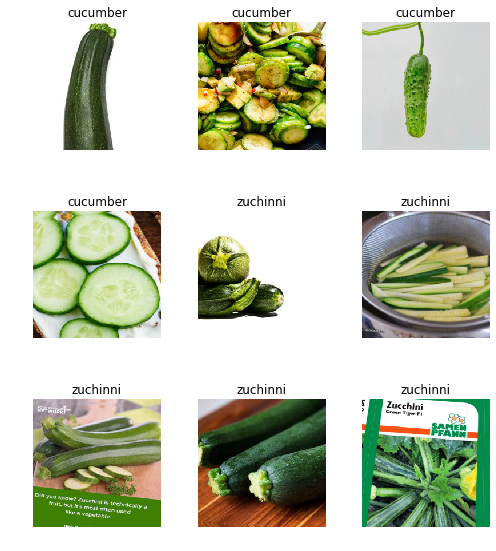

In [22]:
data.show_batch(rows=3, figsize=(7,8))

In [23]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds) # here the validation is just mere 20%

(['cucumber', 'zuchinni'], 2, 334, 83)

Let's train our model

In [24]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [25]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,time
0,0.991812,0.743827,0.421687,01:04
1,0.822822,0.697386,0.253012,01:04
2,0.691083,0.840751,0.265060,01:04
3,0.619413,0.820376,0.240964,01:04
4,0.565663,0.792776,0.253012,01:03
5,0.523781,0.782197,0.253012,01:03
6,0.483162,0.786767,0.253012,01:02


In [19]:
learn.save('stage-1')


In [20]:
learn.unfreeze()

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


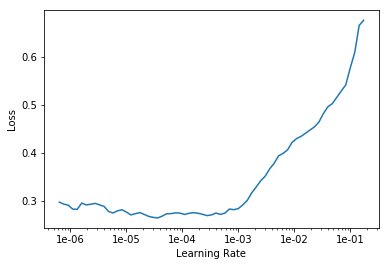

In [22]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(6, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.998584,0.622355,0.301205,01:02
1,0.864761,0.580264,0.337349,01:02
2,0.737333,0.627608,0.301205,01:02
3,0.664386,0.642935,0.277108,01:02
4,0.629012,0.654444,0.277108,01:02
5,0.592082,0.651404,0.277108,01:02


In [15]:
learn.save('stage-2')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

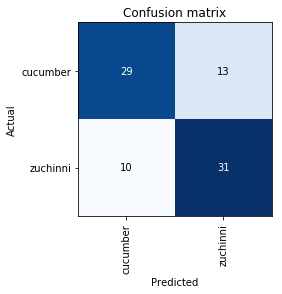

In [17]:
interp.plot_confusion_matrix()

In [18]:
from fastai.widgets import *

In [19]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [20]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

After manually cleaned up the dataset its now time for you to train the ds and run the model

In [9]:
df = pd.read_csv(path/'cleaned.csv', header='infer')

We create a databunch from our csv. We include the data in the training set and we don't use a validation set (DatasetFormatter uses only the training set)

In [13]:
np.random.seed(42)
db = (ImageList.from_df(df, path)
                   .split_none()
                   .label_from_df()
                   .databunch(bs=64,no_check=True))

In [14]:
learn = cnn_learner(db, models.resnet34, metrics=error_rate)
learn = learn.load('stage-1')

While using the image cleaner the results are saved up into the so called cleaned.csv but somewhere the collate_fn keeps throwing error and could not proceed further

In [26]:
learn.export()

In [27]:
defaults.device = torch.device('cpu')

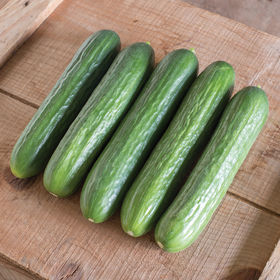

In [30]:
path
img = open_image(path/'test_cucOrzu.jpg')
img

In [31]:
learn = load_learner(path)

In [32]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category cucumber

With 75% accuracy our model could predict if its  cucumber or zucchini